Importing libraries and loading the dataset

In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#Loading dataset
file_path_tyler="C:\\Users\\unuuk\\OneDrive\\Área de Trabalho\\D.S\\Projects\\Tyler\\Tyler The Creator Dataset.csv"
df= pd.read_csv(file_path_tyler)
df.head()

,artist_name,track_name,track_id,album_name,album_id,release_date,popularity,explicit,danceability,energy,...,liveness,valence,tempo,time_signature,featured_artists,type,duration,year,month,day_of_the_week
0,"Tyler, The Creator",EARFQUAKE,5hVghJ4KaYES3BFUATCYn0,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,82,True,0.554,0.498,...,0.795,0.413,79.635,4,NaN,Studio Album,03:10,2019,May,Friday
1,"Tyler, The Creator",Thought I Was Dead (feat. ScHoolboy Q & Santig...,2aYHxnMF2umAavtgBvmkY1,CHROMAKOPIA,0U28P0QVB1QRxpqp5IHOlH,2024-10-28,81,True,0.770,0.859,...,0.673,0.640,129.770,4,"ScHoolboy Q, Santigold",Studio Album,03:27,2024,October,Monday
2,"Tyler, The Creator",See You Again (feat. Kali Uchis),7KA4W4McWYRpgf0fWsJZWB,Flower Boy,2nkto6YNI4rUYTLqEwWJ3o,2017-07-21,89,True,0.558,0.559,...,0.109,0.620,78.558,4,Kali Uchis,Studio Album,03:00,2017,July,Friday
3,"Tyler, The Creator",BEST INTEREST,3jHdKaLCkuNEkWcLVmQPCX,BEST INTEREST,5iUwaD3wFVwfaAfs9Z0eCh,2020-01-25,83,True,0.596,0.575,...,0.334,0.340,98.265,3,NaN,Single,02:07,2020,January,Saturday
4,"Tyler, The Creator",Noid,1YdtGoSYDvVQKoUqSDXX41,CHROMAKOPIA,0U28P0QVB1QRxpqp5IHOlH,2024-10-28,82,True,0.380,0.784,...,0.494,0.418,82.318,4,NaN,Studio Album,04:44,2024,October,Monday


Data overview


In [9]:
#Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       270 non-null    object 
 1   track_name        270 non-null    object 
 2   track_id          270 non-null    object 
 3   album_name        270 non-null    object 
 4   album_id          270 non-null    object 
 5   release_date      270 non-null    object 
 6   popularity        270 non-null    int64  
 7   explicit          270 non-null    bool   
 8   danceability      270 non-null    float64
 9   energy            270 non-null    float64
 10  key               270 non-null    object 
 11  loudness          270 non-null    float64
 12  mode              270 non-null    object 
 13  speechiness       270 non-null    float64
 14  acousticness      270 non-null    float64
 15  instrumentalness  270 non-null    float64
 16  liveness          270 non-null    float64
 1

Data cleaning


In [10]:
#Data Cleaning and Preprocessing

# convert 'release_date' to datetime format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

df.isnull().sum()


artist_name           0
track_name            0
track_id              0
album_name            0
album_id              0
release_date          0
popularity            0
explicit              0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
featured_artists    135
type                  0
duration              0
year                  0
month                 0
day_of_the_week       0
dtype: int64

Heatmap

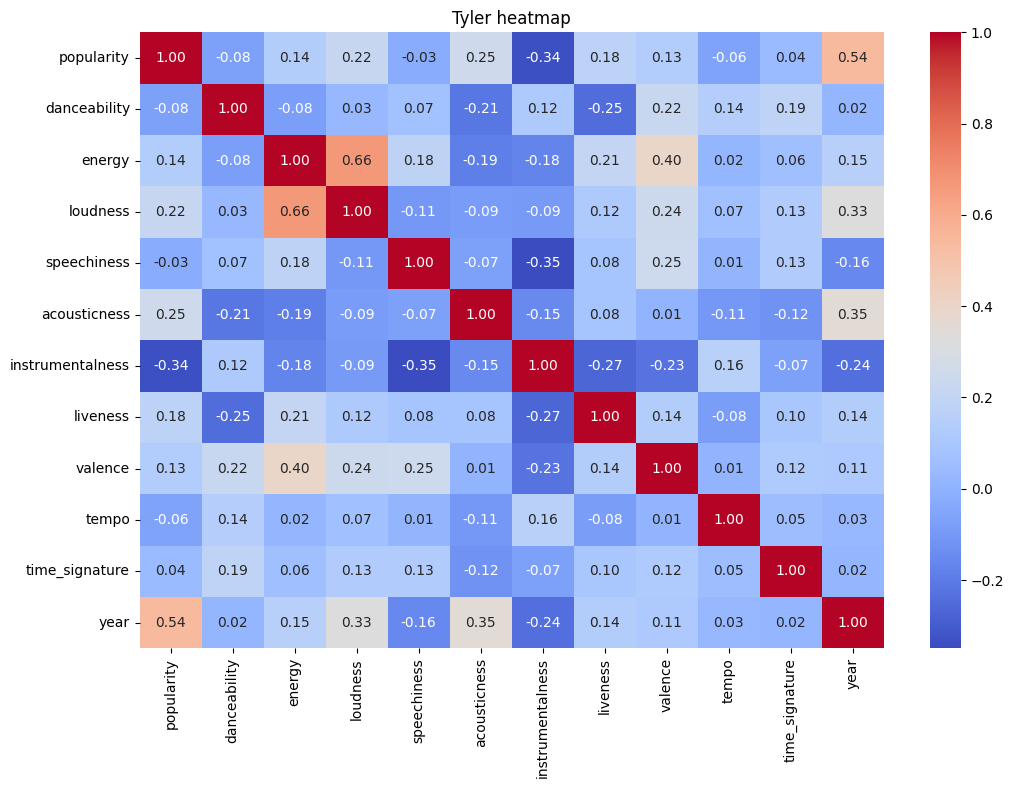

In [11]:
#Heatmaps show relationship between the variables

#Only numeric data should be used in heatmaps

numbers_df= df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(numbers_df.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Tyler heatmap")
plt.show()

Popularity graph

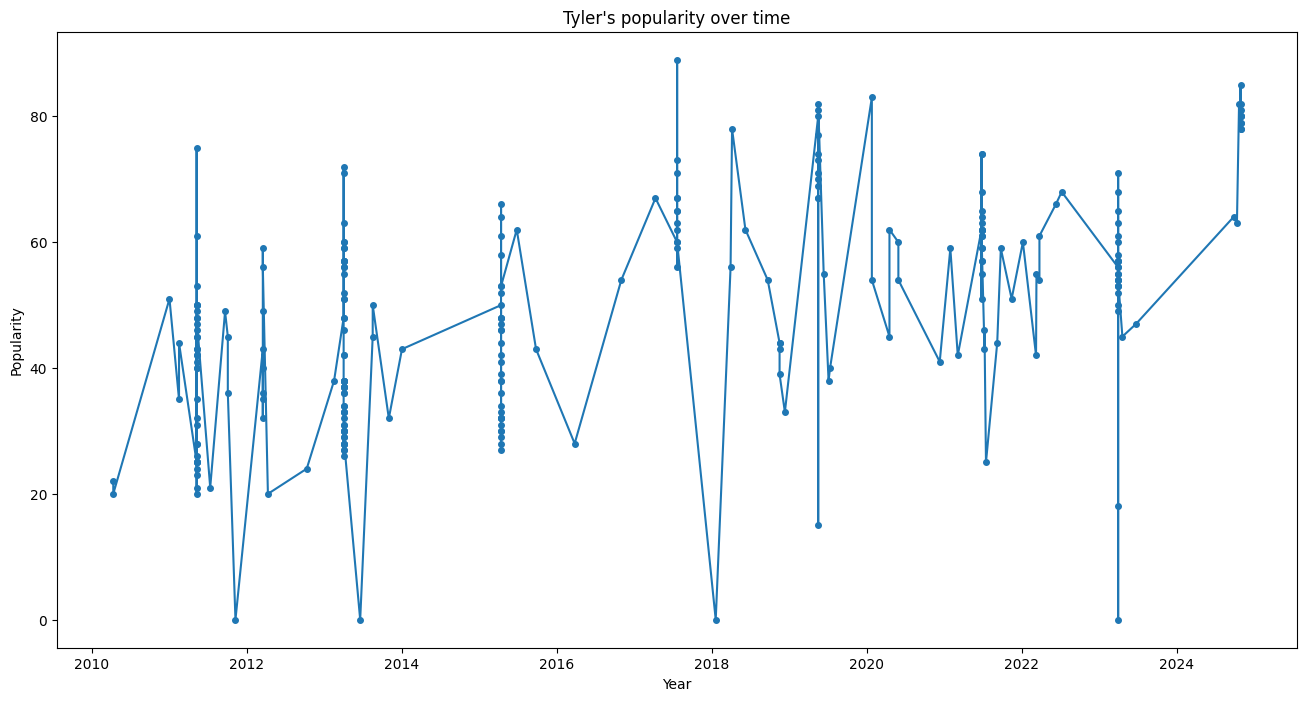

In [12]:
#Popularity over time

df.sort_values('release_date', inplace=True)
plt.figure(figsize=(16,8))
plt.plot(df['release_date'], df['popularity'], marker='o', linestyle='solid', markersize='4')
plt.title("Tyler's popularity over time")
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()


Audio features boxplot


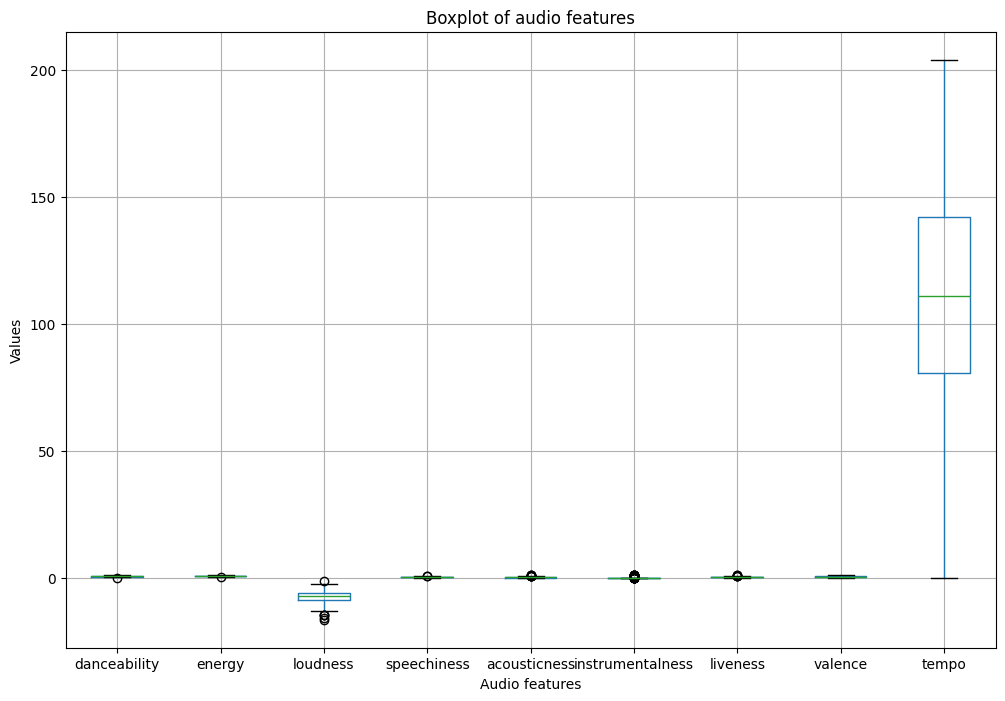

In [13]:
#Boxplots are used to visualize data distribution

audio=['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

plt.figure(figsize=(12,8))
df[audio].boxplot()

plt.title('Boxplot of audio features')
plt.xlabel('Audio features')
plt.ylabel('Values')

plt.show()

Featured artists

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\unuuk\AppData\Local\Temp\ipykernel_12300\100905226.py:4: SyntaxWarning: invalid escape sequence '\$'
  df['featured_artists_cleaned'] = df['featured_artists'].replace({'\$': 'S'}, regex=True)


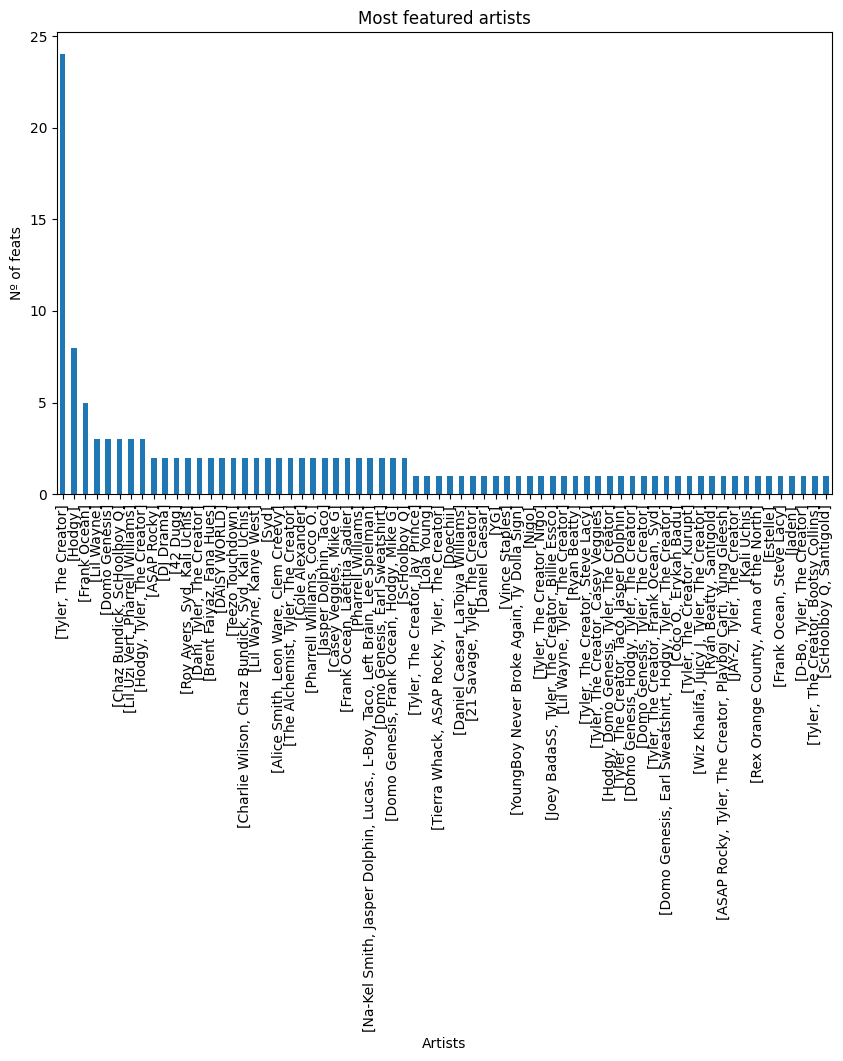

In [14]:
#How many times artists are featured

#Some data preprocessing is necessary
df['featured_artists_cleaned'] = df['featured_artists'].replace({'\$': 'S'}, regex=True)
df['featured_artists_split'] = df['featured_artists_cleaned'].str.split(', ')

expanded_artists=df.explode('featured_artists_split')
feats_per_album= df['featured_artists_split'].value_counts()
plt.figure(figsize=(10,6))
feats_per_album.plot(kind='bar')
plt.title("Most featured artists")
plt.xlabel('Artists')
plt.ylabel("Nº of feats")
plt.show()